## Donors Prediction

**In this notebook we are going to predict that weather a person is going to donate or not.

The dataset is a list of new contacts a client is interested in reaching out to in the next campaign they intend to carry out soon.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df=pd.read_csv('Raw_Data_for_train_test.csv')
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


Let's now check how many columns are categorical. If there are categorical columns we'll turn them to numerical columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [5]:
df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


There's no need of Target_D column. As we are taking TARGET_B as our target variable. So we can drop this

In [6]:
#target d contains a lot of null values ,so delete this column
df=df.drop(['TARGET_D'],axis=1)

Let's See weather our dataset is having null value or not. And if it's having some null values we have to clean our dataset.

In [7]:
df.isnull().sum()

TARGET_B                          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                      4795
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                   4392
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  8810
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP        

In [8]:
df['DONOR_AGE']=df['DONOR_AGE'].fillna(df['DONOR_AGE'].mean())

In [9]:
df['DONOR_AGE']=df['DONOR_AGE'].astype('int64')

In [10]:
df['INCOME_GROUP']=df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0])
df['INCOME_GROUP']=df['INCOME_GROUP'].astype('int64')

In [11]:
df['WEALTH_RATING']=df['WEALTH_RATING'].fillna(df['WEALTH_RATING'].mode()[0])
df['WEALTH_RATING']=df['WEALTH_RATING'].astype('int64')

In [12]:
df=df.dropna()

In [13]:
df['URBANICITY']=df['URBANICITY'].str.replace('?','S')
df['SES']=df['SES'].str.replace('?','2')
df['SES']=df['SES'].astype('int64')

In [14]:
df['CLUSTER_CODE']=df['CLUSTER_CODE'].str.replace('.','40')
df['CLUSTER_CODE']=df['CLUSTER_CODE'].astype('int64')

In [16]:
df.isnull().sum()

TARGET_B                       0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG

<AxesSubplot:xlabel='TARGET_B', ylabel='IN_HOUSE'>

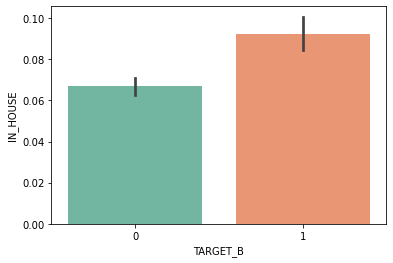

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df['TARGET_B'],y=df['IN_HOUSE'],data=df,palette = "Set2")

<AxesSubplot:xlabel='TARGET_B', ylabel='URBANICITY'>

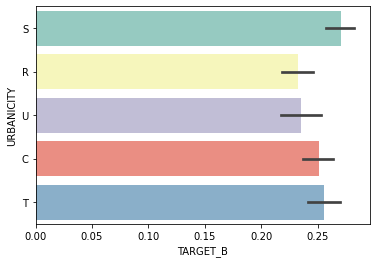

In [18]:
sns.barplot(x=df['TARGET_B'],y=df['URBANICITY'],data=df,palette="Set3")

<AxesSubplot:xlabel='TARGET_B', ylabel='count'>

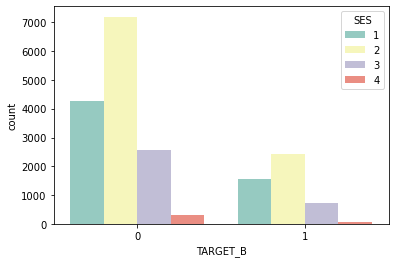

In [19]:
sns.countplot(x=df['TARGET_B'],
              hue=df['SES'],data=df,palette="Set3")

<AxesSubplot:xlabel='TARGET_B', ylabel='count'>

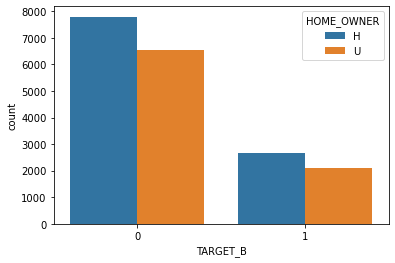

In [20]:
sns.countplot(x=df['TARGET_B'],hue=df['HOME_OWNER'],data=df)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [31]:
y=df['TARGET_B']
x=df.drop(['TARGET_B'],axis=1)

In [32]:
x.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,5,101,87,0,2,2,40,0,2,2,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,12,137,79,0,1,2,45,0,2,7,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,37,113,75,0,2,1,11,0,1,5,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,38,92,58,0,4,2,4,0,1,6,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,41,101,74,0,1,2,49,1,1,2,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(x_train, y_train)

# evaluate the model
preds = model.predict(x_test)
accuracy_score(y_test, preds)

0.7582331416623105

In [42]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# apply scaler
x_train = ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [43]:
model.fit(x_train, y_train)

# evaluate the model
preds = model.predict(x_test)
accuracy_score(y_test, preds)

0.7639832723470988